In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import ast
import warnings

# Configuration for plotting and warnings
sns.set(context='notebook', font_scale=1.1, style='ticks', rc={'figure.figsize': (8, 3), 'figure.facecolor': 'none', 'axes.facecolor': 'none'})
plt.set_loglevel('WARNING')
plt.rcParams.update({'lines.markeredgewidth': 1})
%config InlineBackend.figure_format = 'svg'
warnings.filterwarnings("ignore")

### Solving a single scenario

In [105]:
TOTAL_SCENES = 15
NOCTURNE_CASPS = 416 

df_time_to_solve = pd.DataFrame({
    'Scene' : list(range(0, TOTAL_SCENES)),
    'Time (s)': [315, 232, 820, 881, 509, 650, 670, 403, 2067, 2000, 839, 142, 144, 634, 629],
    'Steps': [1.2e6, 700_000, 1.7e6, 1.72e6, 1.6e6, 2.2e6, 2.2e6, 2.1e6, 9.5e6, 9.1e6, 4.2e6, 900_000, 800_000, 11e6, 3.4e6],
    }
)

df_time_to_solve['Time (minutes)'] = df_time_to_solve['Time (s)'] / 60

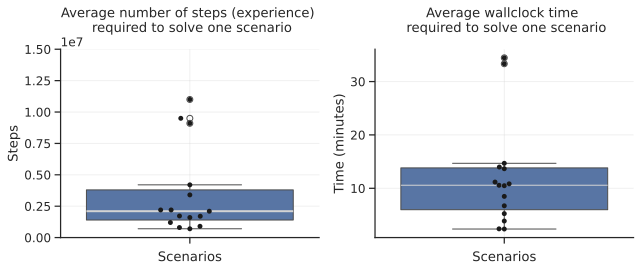

In [150]:
fig, axs = plt.subplots(1, 2, figsize=(9, 4))

sns.boxplot(data=df_time_to_solve, y='Steps', medianprops={"color": "lightgrey", "linewidth": 2}, ax=axs[0]) # inner_kws=dict(box_width=15, whis_width=2, color=".8"), 
sns.swarmplot(data=df_time_to_solve, y='Steps', palette=['k'], marker='.', size=10, ax=axs[0])

sns.boxplot(data=df_time_to_solve, y='Time (minutes)', medianprops={"color": "lightgrey", "linewidth": 1}, ax=axs[1])
sns.swarmplot(data=df_time_to_solve, y='Time (minutes)', color='k', ax=axs[1])

#axs[1].axhline(y = (df_time_to_solve['Steps'].values.mean() / NOCTURNE_CASPS) / 60, color = '#e60000', linestyle = '--', linewidth=3, label='Nocturne')

axs[0].set_title('Average number of steps (experience) \n required to solve one scenario', y=1.06)
axs[1].set_title('Average wallclock time \n required to solve one scenario', y=1.06)
#axs[2].set_title('Time to solve a scenario \n as a function of steps', y=1.06)
axs[0].grid(True, alpha=0.3)
axs[1].grid(True, alpha=0.3)
#axs[2].grid(True, alpha=0.3)
#axs[1].legend(loc='center right', facecolor='white', title='Simulator')
axs[0].set_ylim([0, 1.5e7])
axs[0].set_xlabel('Scenarios')
axs[1].set_xlabel('Scenarios')

#sns.regplot(data=df_time_to_solve, x='Steps', y='Time (minutes)', ax=axs[2], ci=None)

sns.despine()
plt.tight_layout()

fig.savefig('steps_vs_time_boxplot_minutes.pdf', dpi=300, bbox_inches='tight')

In [111]:
df_time_to_solve.describe()

,Scene,Time (s),Steps,Time (minutes)
count,15.000000,15.00000,1.500000e+01,15.000000
mean,7.000000,729.00000,3.488000e+06,12.150000
std,4.472136,581.73337,3.450116e+06,9.695556
min,0.000000,142.00000,7.000000e+05,2.366667
25%,3.500000,359.00000,1.400000e+06,5.983333
50%,7.000000,634.00000,2.100000e+06,10.566667
75%,10.500000,829.50000,3.800000e+06,13.825000
max,14.000000,2067.00000,1.100000e+07,34.450000


In [151]:
# Median minutes
df_time_to_solve['Time (s)'].median() / 60

10.566666666666666

In [152]:
# Mean minutes
df_time_to_solve['Time (s)'].mean() / 60

12.15

In [153]:
# Mean seconds
df_time_to_solve['Time (s)'].mean()

729.0

In [154]:
# Time it takes to solve a scenario in nocturne in seconds
df_time_to_solve['Steps'].values.mean() / NOCTURNE_CASPS

8384.615384615385

### Solving multiple scenarios

In [156]:
df_solve_multiple_tot = pd.DataFrame({
    'Number of unique scenarios': [32, 128, 256, 512, 1024],
    'Time to solve (minutes)': [72, 96, 200, 215, 231],
    'Number of steps': [2e7, 2.7e7, 5.7e7, 6.1e7, 6.7e7],
    'Normalized': False,
    
})

df_solve_multiple_norm = pd.DataFrame({
    'Number of unique scenarios': [32, 128, 256, 512, 1024],
    'Time to solve (minutes)': df_solve_multiple_tot['Time to solve (minutes)']/df_solve_multiple_tot['Number of unique scenarios'],
    'Number of steps': df_solve_multiple_tot['Number of steps']/df_solve_multiple_tot['Number of unique scenarios'],
    'Normalized': True,
    
})

df_solve_multiple = pd.concat([df_solve_multiple_tot, df_solve_multiple_norm])

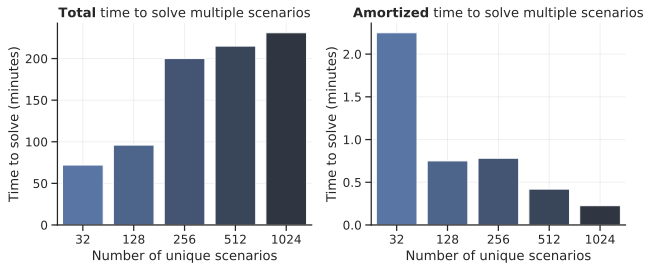

In [168]:
pal = sns.dark_palette("b", reverse=True)
fig, axs = plt.subplots(1, 2, figsize=(9, 4))

axs[0].set_title(r'$\bf{Total}$ time to solve multiple scenarios')
sns.barplot(data=df_solve_multiple_tot, x='Number of unique scenarios', y='Time to solve (minutes)', palette=pal, ax=axs[0], legend=False)

axs[1].set_title(r'$\bf{Amortized}$ time to solve multiple scenarios')
sns.barplot(data=df_solve_multiple_norm, x='Number of unique scenarios', y='Time to solve (minutes)', palette=pal, ax=axs[1], legend=False)

axs[0].grid(True, alpha=0.3)
axs[1].grid(True, alpha=0.3)

plt.tight_layout()

sns.despine()
fig.savefig('solve_scene_scaling_barplot.pdf', dpi=300, bbox_inches='tight')

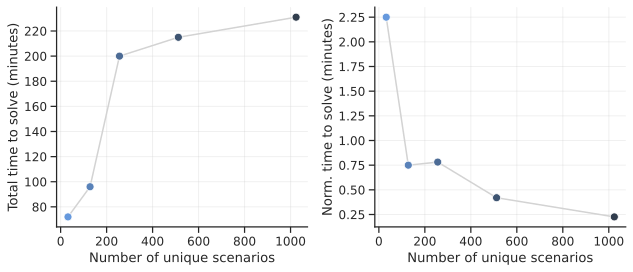

In [100]:
fig, axs = plt.subplots(1, 2, figsize=(9, 4))

sns.lineplot(data=df_solve_multiple, x='Number of unique scenarios', y='Total time to solve (minutes)', ax=axs[0], color='lightgrey', legend=False)
sns.lineplot(data=df_solve_multiple, x='Number of unique scenarios', y='Total time to solve (minutes)', markersize=8, linewidth=1.5, marker='o', hue='Number of unique scenarios', palette=pal, ax=axs[0], legend=False)

sns.lineplot(data=df_solve_multiple, x='Number of unique scenarios', y='Norm. time to solve (minutes)', ax=axs[1], color='lightgrey', legend=False)
sns.lineplot(data=df_solve_multiple, x='Number of unique scenarios', y='Norm. time to solve (minutes)', markersize=8, linewidth=1.5, marker='o', hue='Number of unique scenarios', palette=pal, ax=axs[1], legend=False)

axs[0].grid(True, alpha=0.3)
axs[1].grid(True, alpha=0.3)

plt.tight_layout()

sns.despine()

fig.savefig('solve_scene_scaling_lineplot.pdf', dpi=300, bbox_inches='tight')

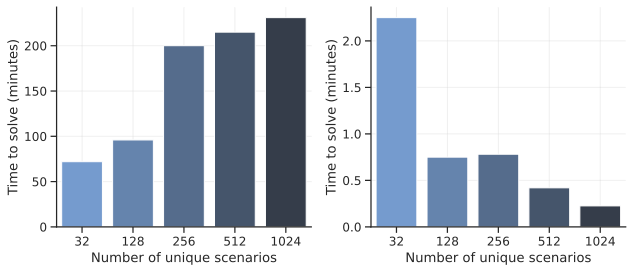

In [157]:
pal = sns.dark_palette("#69d", reverse=True)

fig, axs = plt.subplots(1, 2, figsize=(9, 4))

sns.barplot(data=df_solve_multiple_tot, x='Number of unique scenarios', y='Time to solve (minutes)', hue='Number of unique scenarios', palette=pal, ax=axs[0], legend=False)

sns.barplot(data=df_solve_multiple_norm, x='Number of unique scenarios', y='Time to solve (minutes)', hue='Number of unique scenarios', palette=pal, ax=axs[1], legend=False)

axs[0].grid(True, alpha=0.3)
axs[1].grid(True, alpha=0.3)

plt.tight_layout()

sns.despine()